# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time and Spot price Sensitivity:*  When $r=0$, the theta tends to increase to 0 as the time to expiration decreases to 0, except when the spot price is close to being at the money, where the theta is very negative for small time to expiration, indicating high sensitivity. When $r\neq 0$, if the spot price is less than the strike price, the theta tends to increase to 0 as time to expiration decreases to 0, and if the spot price is greater than the strike price, the theta tends to increase to $-rK$ as time to expiration decreases to 0; again if the spot price is close to being at the money the theta is very negative for small time to expiration, indicating high sensitivity.
- *Put Option – Time and Spot price sensitivity:*  When $r=0$, the theta tends to increase to 0 as the time to expiration decreases to 0, except when the spot price is close to being at the money, where the theta is very negative for small time to expiration, indicating high sensitivity. When $r\neq 0$, if the spot price is less than the strike price, the theta tends to increase to 0 as time to expiration decreases to 0, and if the spot price is greater than the strike price, the theta tends to increase to $rK$ as time to expiration decreases to 0; again if the spot price is close to being at the money the theta is very negative for small time to expiration, indicating high sensitivity.

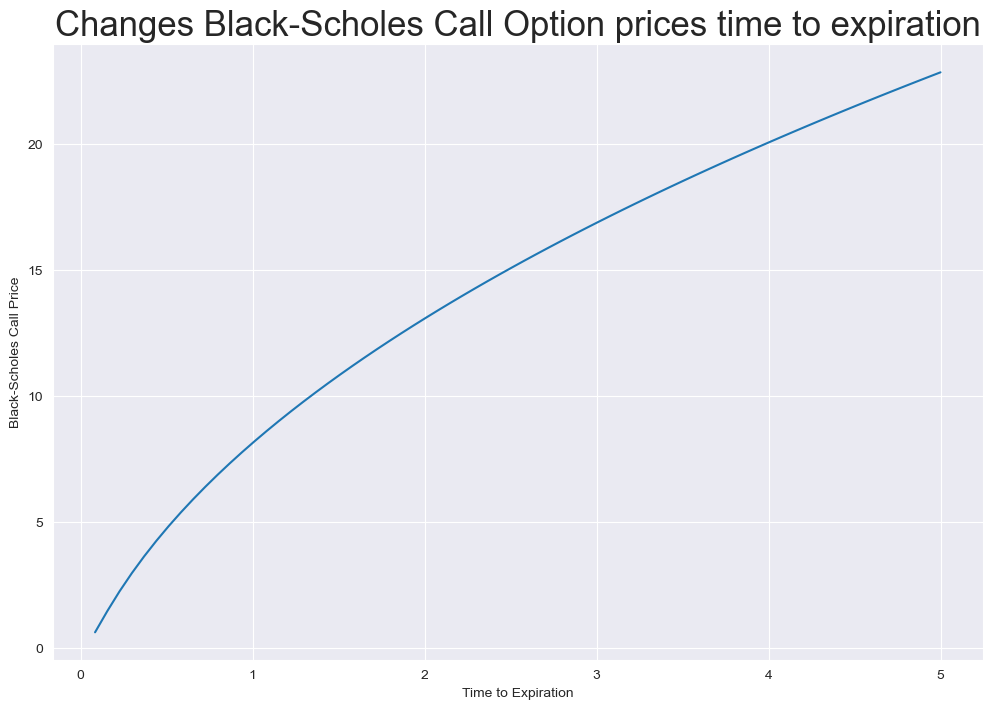

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

The greek $\Theta$ is defined to be the time derivative of the price against time.

For a European call option,

$\Theta = -\frac{SN'(d_1)\sigma}{2\sqrt{\tau}}-rKe^{-r\tau}N(d_2)$.

In the above diagram, as the time to expiration increases, or the time decreases, the Black-Scholes call price increases. So $\Theta$ is negative. This can also be seen from the fact that $\Theta$ is written as a sum of two negative terms.

For a European put option,

$\Theta = -\frac{SN'(d_1)\sigma}{2\sqrt{\tau}}+rKe^{-r\tau}N(d_2)$.

Now it is not clear whether $\Theta$ is positive or negative.

In [20]:

def bs_call_theta(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.pdf(d1)*sigma/(2*np.sqrt(t))-r*K*np.exp(-r*t)*norm.cdf(d2)


def bs_put_theta(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.pdf(d1)*sigma/(2*np.sqrt(t))+r*K*np.exp(-r*t)*norm.cdf(d2)


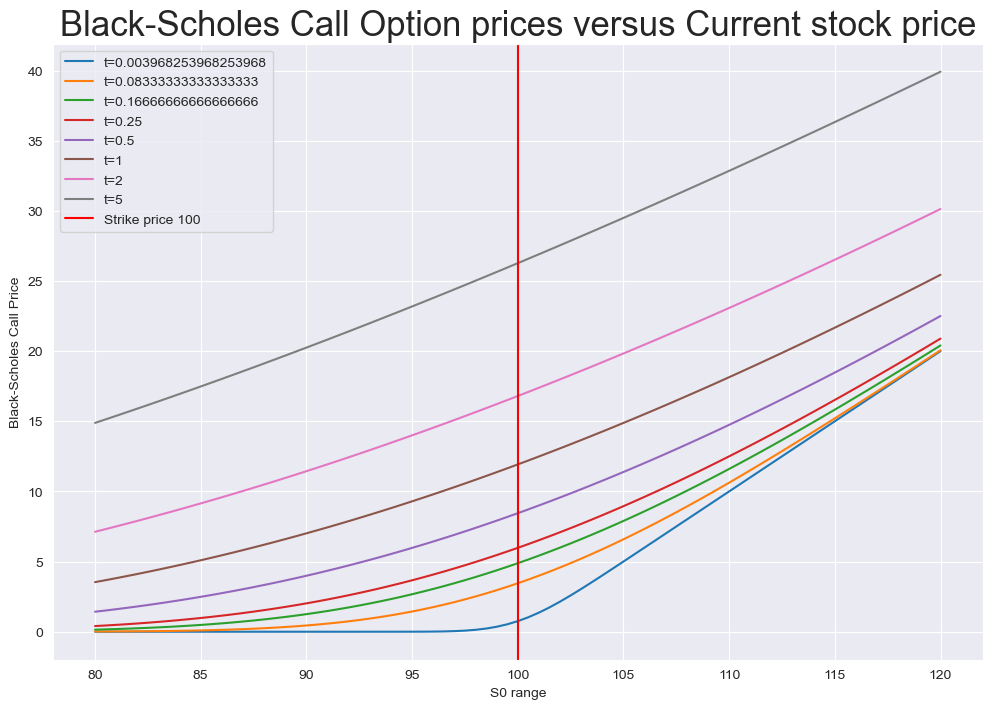

In [23]:
#We plot the Call option price against the current stock price, for each time period.

S0_range = np.linspace(80,120,81)
K = 100
sigma = .3

times = [1/252,1/12,2/12,3/12,6/12,1,2,5]
plt.figure(figsize = (12,8))
for time in times:
    call_prices = [bs_call(S0,K,sigma, t = time) for S0 in S0_range]
    plt.plot(S0_range, call_prices,label=f't={time}')
plt.title('Black-Scholes Call Option prices versus Current stock price', size = 25)
plt.xlabel('S0 range')
plt.ylabel('Black-Scholes Call Price')
plt.axvline(K, label = f'Strike price {K}', color = 'red')
plt.legend()
plt.show()

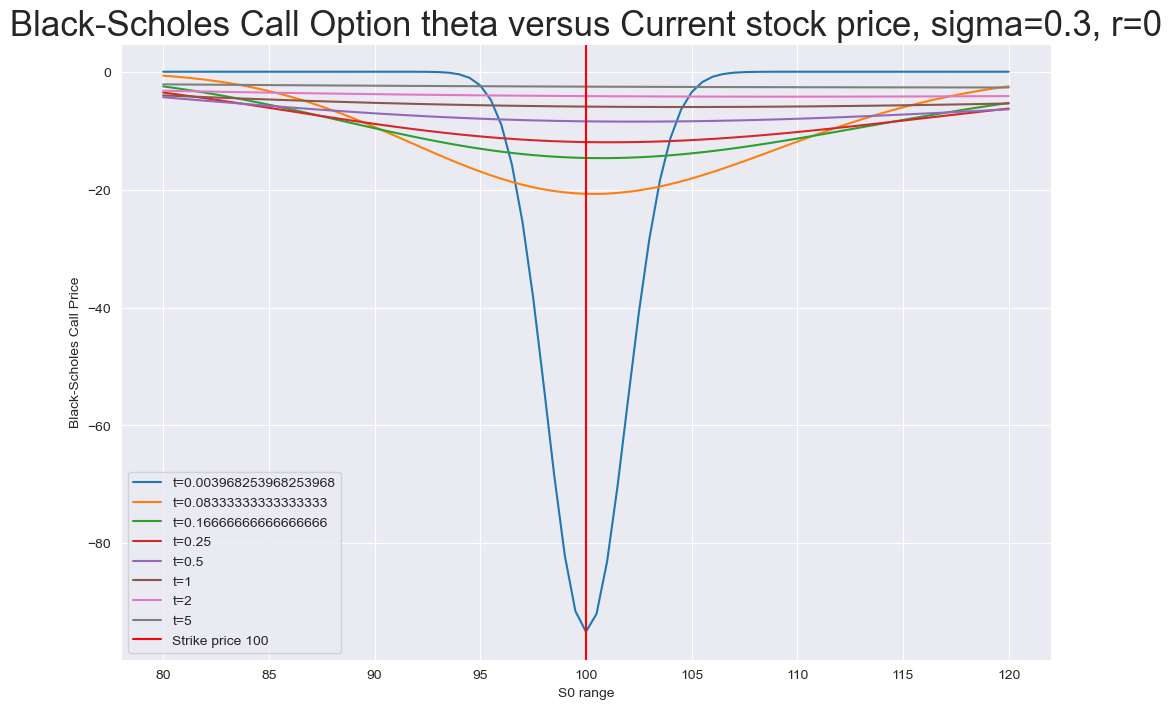

In [24]:
#We plot the Call option theta against the current stock price, for each time period.

S0_range = np.linspace(80,120,81)
K = 100
sigma = .3

times = [1/252,1/12,2/12,3/12,6/12,1,2,5]
plt.figure(figsize = (12,8))
for time in times:
    call_theta_prices = [bs_call_theta(S0,K,sigma, t = time) for S0 in S0_range]
    plt.plot(S0_range, call_theta_prices,label=f't={time}')
plt.title(f'Black-Scholes Call Option theta versus Current stock price, sigma={sigma}, r=0', size = 25)
plt.xlabel('S0 range')
plt.ylabel('Black-Scholes Call Price')
plt.axvline(K, label = f'Strike price {K}', color = 'red')
plt.legend()
plt.show()

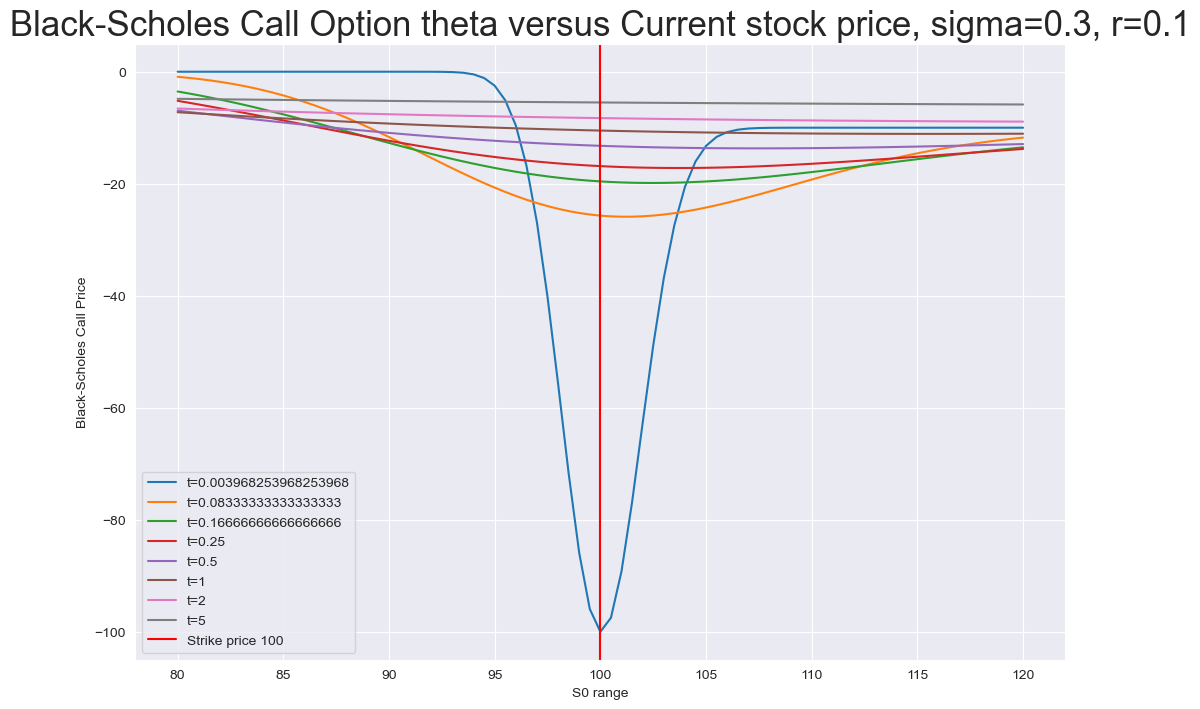

In [25]:
#We plot the Call option theta against the current stock price, for each time period.

S0_range = np.linspace(80,120,81)
K = 100
sigma = .3

times = [1/252,1/12,2/12,3/12,6/12,1,2,5]
plt.figure(figsize = (12,8))
for time in times:
    call_theta_prices = [bs_call_theta(S0,K,sigma, t = time,r=0.1) for S0 in S0_range]
    plt.plot(S0_range, call_theta_prices,label=f't={time}')
plt.title(f'Black-Scholes Call Option theta versus Current stock price, sigma={sigma}, r=0.1', size = 25)
plt.xlabel('S0 range')
plt.ylabel('Black-Scholes Call Price')
plt.axvline(K, label = f'Strike price {K}', color = 'red')
plt.legend()
plt.show()

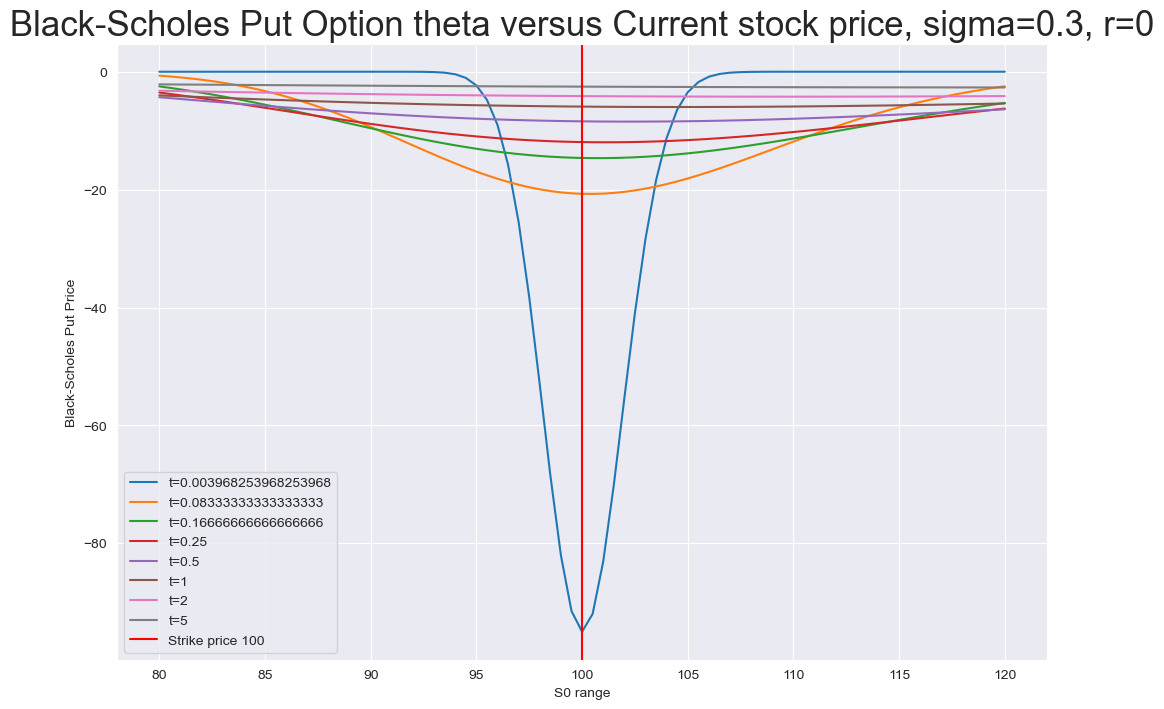

In [26]:
#We plot the Put option theta against the current stock price, for each time period.

S0_range = np.linspace(80,120,81)
K = 100
sigma = .3

times = [1/252,1/12,2/12,3/12,6/12,1,2,5]
plt.figure(figsize = (12,8))
for time in times:
    put_theta_prices = [bs_put_theta(S0,K,sigma, t = time) for S0 in S0_range]
    plt.plot(S0_range, put_theta_prices,label=f't={time}')
plt.title(f'Black-Scholes Put Option theta versus Current stock price, sigma={sigma}, r=0', size = 25)
plt.xlabel('S0 range')
plt.ylabel('Black-Scholes Put Price')
plt.axvline(K, label = f'Strike price {K}', color = 'red')
plt.legend()
plt.show()

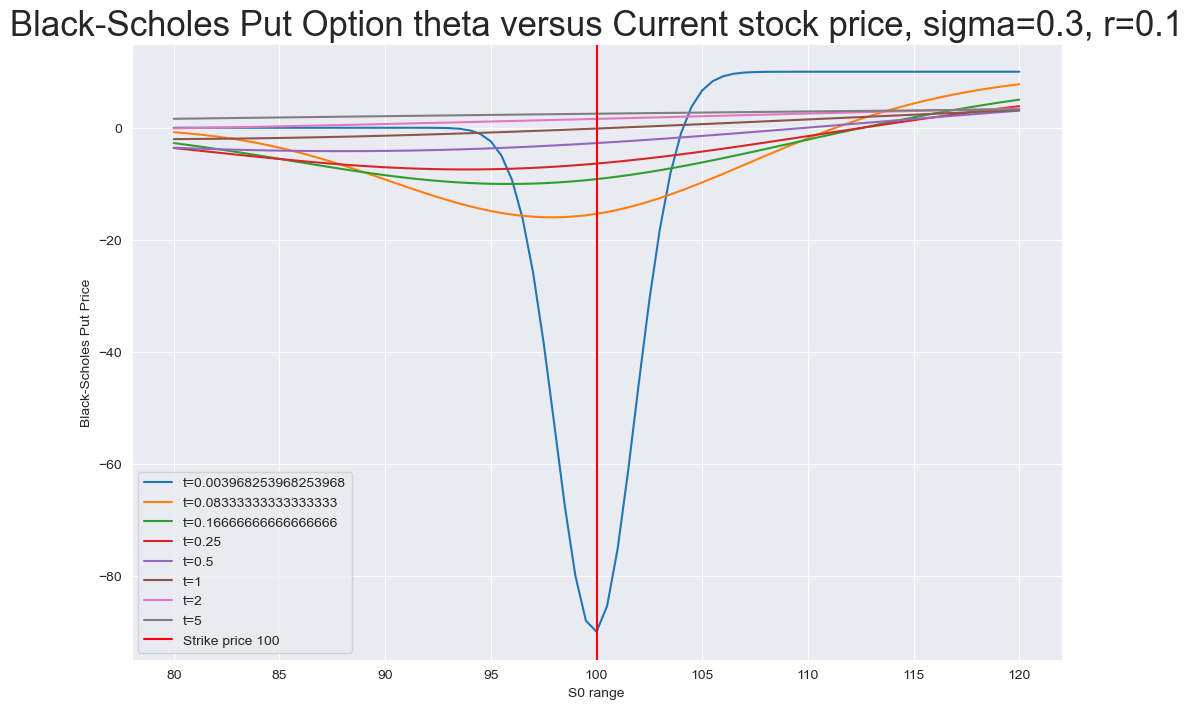

In [28]:
#We plot the Put option theta against the current stock price, for each time period.

S0_range = np.linspace(80,120,81)
K = 100
sigma = .3

times = [1/252,1/12,2/12,3/12,6/12,1,2,5]
plt.figure(figsize = (12,8))
for time in times:
    put_theta_prices = [bs_put_theta(S0,K,sigma, t = time,r=0.1) for S0 in S0_range]
    plt.plot(S0_range, put_theta_prices,label=f't={time}')
plt.title(f'Black-Scholes Put Option theta versus Current stock price, sigma={sigma}, r=0.1', size = 25)
plt.xlabel('S0 range')
plt.ylabel('Black-Scholes Put Price')
plt.axvline(K, label = f'Strike price {K}', color = 'red')
plt.legend()
plt.show()